# Homework 4

# How to find a quasar?

# Part I: BPT Diagram


1. Use SDSS DR18 SQL search to find all galaxies which have only the narrow emission lines
(FWHM<500 km/s), high median signal to noise ratio in g band (S/N>40), and fluxes of lines:
[O III] 5007, Hβ, Hα and [N II] 6583 larger than 5 e-17 erg/s/cm^2. Set criteria so that the
fluxes are larger than errors in flux multiplied with 5 in order to get good results. SQL output
should be the fluxes of these lines.

2. For the obtained sample make the diagnostic BPT (Baldwin, Philips and Terlevich) diagram.
This diagram determines the dominant ionization source for the objects: accretion disk (AGN)
or hot emission stars (H II - star-burst region). For the BPT diagram use the flux ratios of the
lines: [O III] 5007/Hβ vs. [N II]6583/Hα.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading the csv file
# data set of galaxies downloaded from SDSS by using SQL query
import csv
data1 = pd.read_csv("C:/Users/SREEPARNA/OneDrive/Documents/hw4agn.csv")
data1


,plate,mjd,fiberid,oiii_5007_flux,h_beta_flux,h_alpha_flux,nii_6584_flux
0,658,52146,459,159.69490,391.77050,1.616085e+03,760.71960
1,661,52163,538,633.18990,1147.45100,4.687902e+03,3092.07500
2,661,52163,601,142.74810,601.24010,4.676298e+03,2294.91700
3,905,52643,497,24484.28000,14679.14000,2.760000e+07,9508.75600
4,906,52368,534,9143.34700,3444.20200,1.013975e+04,1255.07800
...,...,...,...,...,...,...,...
980,2218,53816,537,106.72010,451.01430,3.397340e+03,2429.06300
981,2218,53816,557,67.58727,42.94370,1.554984e+02,206.77970
982,2219,53816,458,576.63670,751.27550,2.943388e+03,1401.70500
983,2222,53799,548,103.26920,71.25346,2.602286e+02,366.55160


In [2]:
#extracting the flux values of each line from dataframe in units of 1e-17 erg/s/cm^2.
Hb = data1['h_beta_flux'] 
Ha = data1['h_alpha_flux'] 
oiii = data1['oiii_5007_flux'] 
nii = data1['nii_6584_flux'] 

In [3]:
#ratios of oiii/H beta line flux 
oiii_Hb = data1['oiii_5007_flux'] / data1['h_beta_flux'] 
#oiii_Hb
l_oiii_Hb = np.log10(oiii_Hb)
l_oiii_Hb

0     -0.389741
1     -0.258200
2     -0.624478
3      0.222187
4      0.424017
         ...   
980   -0.625944
981    0.196965
982   -0.114897
983    0.161165
984    0.245545
Length: 985, dtype: float64

In [4]:
#ratios of nii/H alpha line flux 
nii_Ha = data1['nii_6584_flux'] / data1['h_alpha_flux']
#nii_Ha
l_nii_Ha = np.log10(nii_Ha)
l_nii_Ha

0     -0.327240
1     -0.180729
2     -0.309135
3     -3.462785
4     -0.907357
         ...   
980   -0.145700
981    0.123782
982   -0.322191
983    0.148780
984   -0.475967
Length: 985, dtype: float64

(-1.5, 0.5)

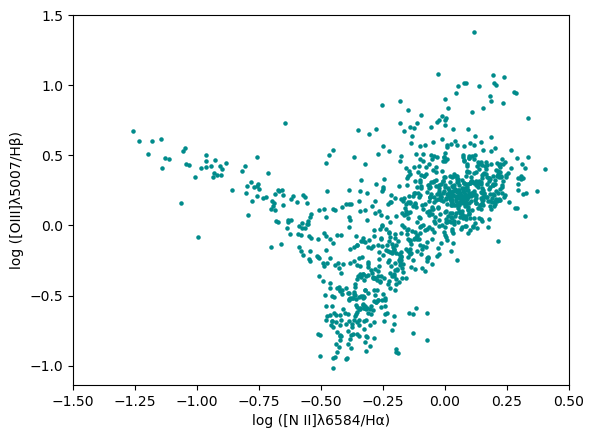

In [5]:
#plot BPT diagram
plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')
plt.scatter(l_nii_Ha, l_oiii_Hb , color='darkcyan', s=5)
plt.xlim(-1.5,0.5)

In [6]:
# the theoretical curve from the paper Kewley et al. 2001, ApJ, 556, 121
#eqn 5, pg 
l_oiii_Hb1 = 0.61/(l_nii_Ha-0.47) + 1.19
l_oiii_Hb1

0      0.424860
1      0.252589
2      0.407081
3      1.034894
4      0.747123
         ...   
980    0.199258
981   -0.571896
982    0.419984
983   -0.709011
984    0.545157
Length: 985, dtype: float64

In [7]:
# empirical curve from the paper Kauffmann et al. 2003, MNRAS, 346, 1055
# eqn 1, pg 5
l_oiii_Hb2 = 0.61/(l_nii_Ha-0.05) + 1.3
l_oiii_Hb2

0     -0.317009
1     -1.343800
2     -0.398525
3      1.126349
4      0.662829
         ...   
980   -1.817012
981    9.567602
982   -0.338944
983    7.475333
984    0.140231
Length: 985, dtype: float64

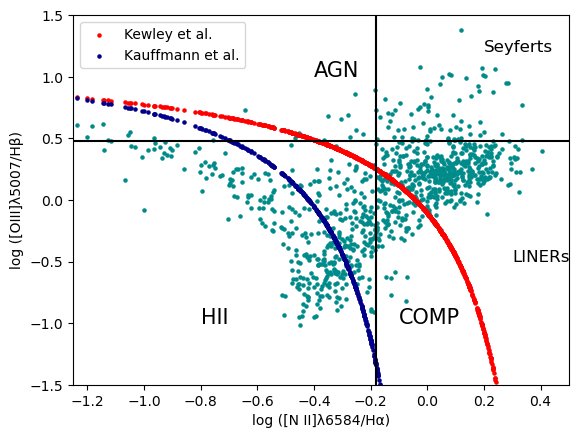

In [8]:
# plotting of the separation curves
plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')
plt.scatter(l_nii_Ha, l_oiii_Hb , color='darkcyan', s=5)
plt.scatter(l_nii_Ha, l_oiii_Hb1 , color='red', s=5, label='Kewley et al.')
plt.scatter(l_nii_Ha, l_oiii_Hb2 , color='darkblue', s=5, label='Kauffmann et al.')
plt.xlim(-1.25,0.5)
plt.ylim(-1.5,1.5)

# putting text labels in a plot
plt.text(-0.1,-1.0, 'COMP', fontsize=15)
plt.text(0.3,-0.5, 'LINERs', fontsize=12)
plt.text(-0.4,1.0, 'AGN', fontsize=15)
plt.text(-0.8,-1.0, 'HII', fontsize=15)
plt.text(0.2,1.2, 'Seyferts', fontsize=12)

plt.axhline(0.48, linestyle='-', color='black')
plt.axvline(-0.18, linestyle='-', color='black')
plt.legend()

# Part II: Classification of galaxies using mid-IR colors

1. For the sample of galaxies selected from SDSS database in Part I, find the corresponding WISE
colors. Adapt the following query example to find WISE fluxes needed for obtaining colors:
https://skyserver.sdss.org/dr16/en/help/docs/realquery.aspx#wisexmatch

#query for obtaining wise colours

SELECT

--count(*)

s.plate, s.mjd, s.fiberid, g.h_alpha_flux, g.h_beta_flux, g.oiii_5007_flux, g.nii_6584_flux, w.w1mpro, w.w2mpro, w.w3mpro

FROM #upload u

JOIN SpecObjAll s ON (s.plate=u.up_plate AND s.mjd=u.up_mjd AND s.fiberid=u.up_fiber)

JOIN GalSpecLine as g ON s.specobjid = g.specobjid

JOIN wise_xmatch AS x ON s.bestobjid = x.sdss_objid

JOIN wise_allsky as W on x.wise_cntr = w.cntr 


In [9]:
#reading the data from cross matched file obtained by cross matching SDSS data (data1) with WISE
#the fluxes here are obtained from SDSS for the same objects as above
# w1mpro,w2mpro,w3mpro are corresponding WISE colours
data2 = pd.read_csv("C:/Users/SREEPARNA/OneDrive/Documents/crossmatched2.csv")
data2

,plate,mjd,fiberid,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,w1mpro,w2mpro,w3mpro
0,769,54530,41,152.50570,36.50747,430.99270,238.28870,12.072,12.066,10.455
1,1449,53116,338,648.85480,149.96640,59.03924,354.06480,10.249,10.128,6.214
2,1594,52992,566,1279.97700,338.05730,583.42970,1083.89900,11.086,11.113,9.666
3,566,52238,437,88.22795,38.45169,61.03000,84.88641,11.317,11.469,10.896
4,2520,54584,378,161.46710,31.01513,162.77620,161.94410,11.964,11.841,9.208
...,...,...,...,...,...,...,...,...,...,...
966,501,52235,566,216.91380,53.39894,41.79954,156.91890,12.077,12.129,9.679
967,465,51910,223,2218.36000,762.29380,2055.71500,205.71480,13.641,13.541,10.742
968,2097,53491,515,1955.42100,410.12650,4263.21900,3082.21500,11.269,10.757,7.418
969,895,52581,415,1502.73100,417.26380,1302.81400,1001.81800,12.500,12.479,9.203


2. Assign classes (AGN & (u)LIRGS, Spheroids, Intermediate disks and SF disks) to all objects in
the sample using the thresholds from the image on the bottom right (dashed lines). How do 
these classes compare to ones obtained using BPT diagram from Part I?

In [10]:
#extracting data
W1 = data2['w1mpro']
W2 = data2['w2mpro']
W3 = data2['w3mpro']

In [11]:
# calculating W1 - W2
W_y = []
W_y = data2['w1mpro'] - data2['w2mpro']
#W_y
data2['W1-W2'] = W_y


In [12]:
# calculating W2 - W3
W_x = []
W_x = data2['w2mpro'] - data2['w3mpro']
#W_x
data2['W2-W3'] = W_x
#data2

In [13]:
# Create an empty list to store the galaxy classifications
classifications = []

# Loop over the galaxy IDs
for i in range(len(data2)):
   
    # Classify the galaxy
    if W_y[i] >= 0.8:
        classification = 'AGN & (u)LIRGS'
    elif W_y[i] <= 0.8 and W_x[i] <= 3.5 and W_x[i]>=2:
        classification = 'Intermediate disks'
    elif W_y[i] <= 0.8 and W_x[i] >= 3.5:
        classification = 'SF Disks'
    elif W_y[i] <= 0.8 and W_x[i] <= 2:
        classification = 'SPHEROIDS'
    # Append the classification to the list
    classifications.append(classification)

# Add the classifications to the DataFrame
data2['WISE classification'] = classifications
#data2


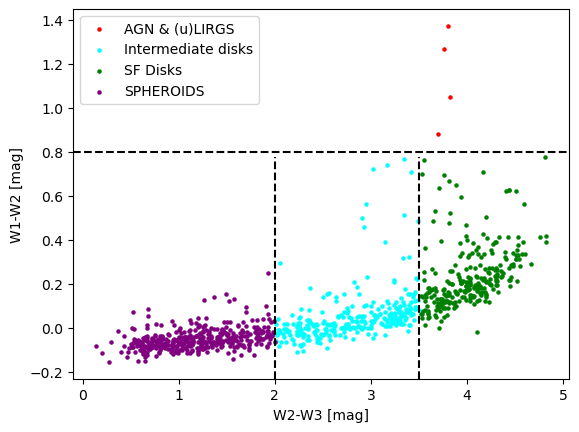

In [14]:
# plotting of WISE-WISE colour diagram for the above galaxies obtained using SDSS

#plt.scatter(W_x, W_y, color='cyan', s=5)
plt.xlabel('W2-W3 [mag]')
plt.ylabel('W1-W2 [mag]')

AGN = (W_y >= 0.8) 
ID = ((W_y <= 0.8) & (W_x <= 3.5) & (W_x>=2))
SF = ((W_y <= 0.8) & (W_x >= 3.5))
SPHEROIDS = ((W_y <= 0.8) & (W_x <= 2))

plt.scatter(W_x[AGN], W_y[AGN], color='red', s=5, label='AGN & (u)LIRGS')
plt.scatter(W_x[ID], W_y[ID], color='cyan', s=5, label='Intermediate disks')
plt.scatter(W_x[SF], W_y[SF], color='green', s=5, label='SF Disks')
plt.scatter(W_x[SPHEROIDS], W_y[SPHEROIDS], color='purple', s=5, label='SPHEROIDS')
plt.legend()

#plotting a horizontal line in a scatter plot
plt.axhline(0.8, linestyle='--', color='black')   

#plotting a vertical line in a scatter plot
plt.axvline(2, ymax=0.6, linestyle='--', color='black')
plt.axvline(3.5, ymax=0.6, linestyle='--', color='black')

In [15]:
# adding columns to the dataframe for plotting BPT diagram

#ratios of oiii/H beta line flux 
L_oiii_Hb3 = []
oiii_Hb3 = data2['oiii_5007_flux'] / data2['h_beta_flux'] 
L_oiii_Hb3 = np.log10(oiii_Hb3)
data2['log ([OIII]\u03BB5007/H\u03B2)'] = L_oiii_Hb3 


#ratios of nii/H alpha line flux 
l_nii_Ha3 = []
nii_Ha3 = data2['nii_6584_flux'] / data2['h_alpha_flux']
l_nii_Ha3 = np.log10(nii_Ha3)
data2['log ([N II]\u03BB6584/H\u03B1)'] = l_nii_Ha3

data2

,plate,mjd,fiberid,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,w1mpro,w2mpro,w3mpro,W1-W2,W2-W3,WISE classification,log ([OIII]λ5007/Hβ),log ([N II]λ6584/Hα)
0,769,54530,41,152.50570,36.50747,430.99270,238.28870,12.072,12.066,10.455,0.006,1.611,SPHEROIDS,1.072088,0.193817
1,1449,53116,338,648.85480,149.96640,59.03924,354.06480,10.249,10.128,6.214,0.121,3.914,SF Disks,-0.404853,-0.263065
2,1594,52992,566,1279.97700,338.05730,583.42970,1083.89900,11.086,11.113,9.666,-0.027,1.447,SPHEROIDS,0.236998,-0.072213
3,566,52238,437,88.22795,38.45169,61.03000,84.88641,11.317,11.469,10.896,-0.152,0.573,SPHEROIDS,0.200628,-0.016768
4,2520,54584,378,161.46710,31.01513,162.77620,161.94410,11.964,11.841,9.208,0.123,2.633,Intermediate disks,0.720017,0.001281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,501,52235,566,216.91380,53.39894,41.79954,156.91890,12.077,12.129,9.679,-0.052,2.450,Intermediate disks,-0.106361,-0.140612
967,465,51910,223,2218.36000,762.29380,2055.71500,205.71480,13.641,13.541,10.742,0.100,2.799,Intermediate disks,0.430841,-1.032766
968,2097,53491,515,1955.42100,410.12650,4263.21900,3082.21500,11.269,10.757,7.418,0.512,3.339,Intermediate disks,1.016820,0.197623
969,895,52581,415,1502.73100,417.26380,1302.81400,1001.81800,12.500,12.479,9.203,0.021,3.276,Intermediate disks,0.494472,-0.176092


In [23]:
l_oiii_Hb4 = 0.61/(l_nii_Ha3-0.47) + 1.19
l_oiii_Hb5 = 0.61/(l_nii_Ha3-0.05) + 1.3

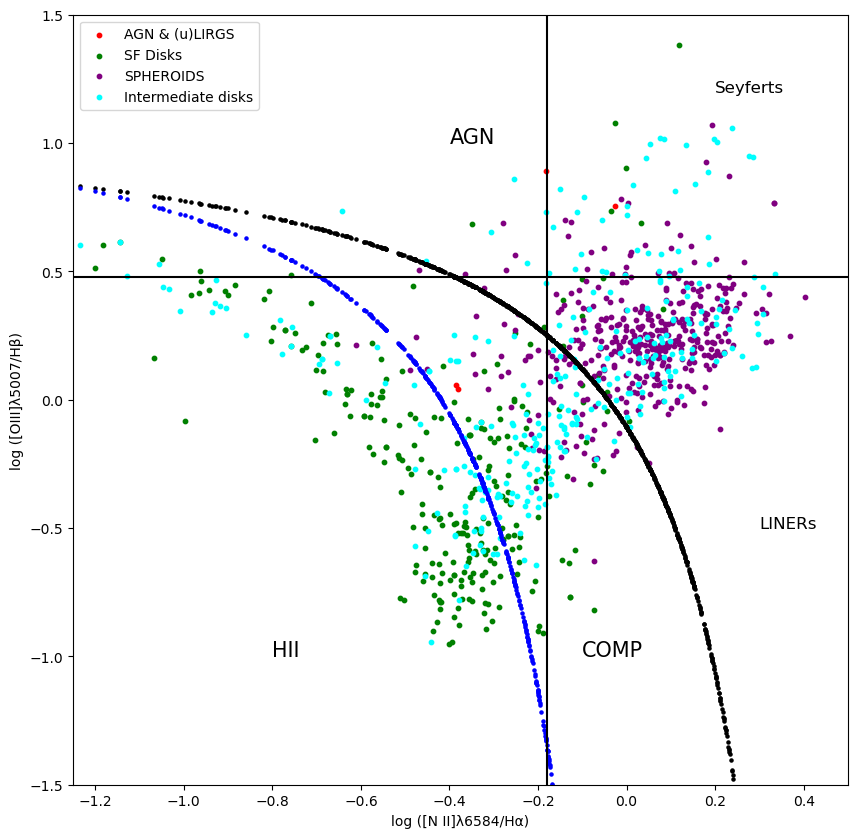

In [29]:
# plotting the WISE colour plot within the BPT diagram for comparison

plt.figure(figsize=(10,10))
plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')
plt.xlim(-1.25,0.5)
plt.ylim(-1.5,1.5)

# plotting using Wise classification by defining a function
def plot_wise(data, classification, color):
    data_to_plot = data[data2['WISE classification'] == classification]
    plt.scatter(data_to_plot['log ([N II]λ6584/Hα)'], data_to_plot['log ([OIII]λ5007/Hβ)'], color=color, s=10)

wise_class = ['AGN & (u)LIRGS', 'SF Disks', 'SPHEROIDS', 'Intermediate disks']
colors = ['red', 'green', 'purple', 'cyan']


for i in range(len(wise_class)):
    plot_wise(data2, wise_class[i], colors[i])

plt.legend(wise_class)



# plotting of the separation curves
plt.scatter(l_nii_Ha3, l_oiii_Hb4 , color='black', s=5, label='Kewley et al.')
plt.scatter(l_nii_Ha3, l_oiii_Hb5 , color='blue', s=5, label='Kauffmann et al.')
#plt.legend() // this command here is not working properly...DOUBT

# putting text labels in a plot
plt.text(-0.1,-1.0, 'COMP', fontsize=15)
plt.text(0.3,-0.5, 'LINERs', fontsize=12)
plt.text(-0.4,1.0, 'AGN', fontsize=15)
plt.text(-0.8,-1.0, 'HII', fontsize=15)
plt.text(0.2,1.2, 'Seyferts', fontsize=12)

plt.axhline(0.48, linestyle='-', color='black')
plt.axvline(-0.18, linestyle='-', color='black')




EXPLANATION OF THE FUNCTION BLOCK IN THE ABOVE CELL:

We are defining a function named plot_wise that takes in three arguments: data, classification, color.

The second line creates a new variable named data_to_plot which contains a subset of the input data. This subset of data is filtered based on a condition that checks the value of the column named 'WISE classification' in the data2 dataframe. The condition is checking if the value of the 'WISE classification' column is equal to the value of the classification argument that was passed to the plot_wise function.

The plot_data function is filtering the data based on the classification argument and creating a new variable data_to_plot that contains only the rows of data where the 'WISE classification' column is equal to the classification argument. 
We define the classifications (named as wise_class variable) and colors as lists, and loop over them to plot the data and create the legend at the end.

Here we do not need to index into the data frame using i, as we are using boolean indexing to select the relevant data to plot. This simplifies the code and makes it more readable.

From the above plot we see that:

    i) intermediate disks lies almost everywhere in the BPT plot.
    ii) spheroids mostly fall in the LINERs region.
    iii) SF disks lie along HII and COMP regions.
    iv) AGN and (u)LIRGS lie within AGN and COMP region of BPT classification.
        

3. Locate one random object on the WISE color-color plot having W1–W2>=0.8 (Assef et al. 
2013) and address the following:
- Where is the object located in this plot? Mark it clearly on the graph.
- Does it agree with the optical classification from BPT diagram?
- Draw some conclusions about the type of AGN using the WISE color-color plot.


In [18]:
# extracting the values of data which satisfy the condition
# creating a boolean mask based on the condition W1-W2>=0.8
mask = data2['W1-W2'] > 0.8

# use the mask to extract the desired data
desired_data = data2[mask]
desired_data

,plate,mjd,fiberid,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6584_flux,w1mpro,w2mpro,w3mpro,W1-W2,W2-W3,WISE classification,log ([OIII]λ5007/Hβ),log ([N II]λ6584/Hα)
262,952,52409,247,14658.14,3131.9990,3576.736,6027.313,7.766,6.395,2.598,1.371,3.797,AGN & (u)LIRGS,0.057665,-0.385955
480,2117,54115,351,2661.47,569.2051,4433.455,1745.936,10.131,9.081,5.255,1.050,3.826,AGN & (u)LIRGS,0.891474,-0.183093
789,1776,53858,632,16633.67,3754.2180,4133.134,6907.328,10.197,9.315,5.619,0.882,3.696,AGN & (u)LIRGS,0.041760,-0.381678
871,1665,52976,348,19829.88,4320.7400,24567.800,18681.270,10.152,8.888,5.124,1.264,3.764,AGN & (u)LIRGS,0.754808,-0.025914


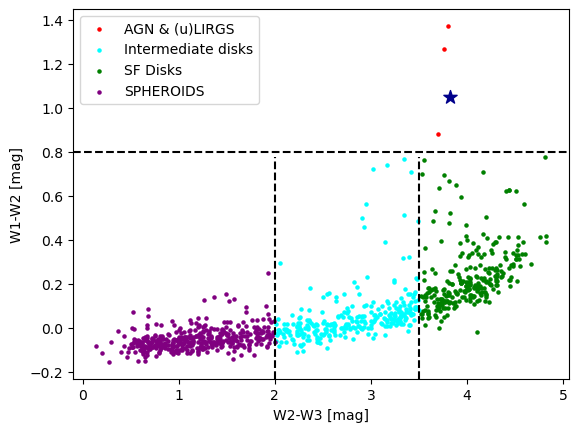

In [19]:
plt.xlabel('W2-W3 [mag]')
plt.ylabel('W1-W2 [mag]')

AGN = (W_y >= 0.8) 
ID = ((W_y <= 0.8) & (W_x <= 3.5) & (W_x>=2))
SF = ((W_y <= 0.8) & (W_x >= 3.5))
SPHEROIDS = ((W_y <= 0.8) & (W_x <= 2))

plt.scatter(W_x[AGN], W_y[AGN], color='red', s=5, label='AGN & (u)LIRGS')
plt.scatter(W_x[ID], W_y[ID], color='cyan', s=5, label='Intermediate disks')
plt.scatter(W_x[SF], W_y[SF], color='green', s=5, label='SF Disks')
plt.scatter(W_x[SPHEROIDS], W_y[SPHEROIDS], color='purple', s=5, label='SPHEROIDS')
plt.legend()

#plotting a horizontal line in a scatter plot
plt.axhline(0.8, linestyle='--', color='black')   

#plotting a vertical line in a scatter plot
plt.axvline(2, ymax=0.6, linestyle='--', color='black')
plt.axvline(3.5, ymax=0.6, linestyle='--', color='black')
 
# Mark the object
plt.scatter(3.826, 1.050, s=100, c='darkblue', marker='*')




a) The marked object is indicated by the blue star. It is located in 'AGN & (u)LIRGS' region of the WISE colour plot.

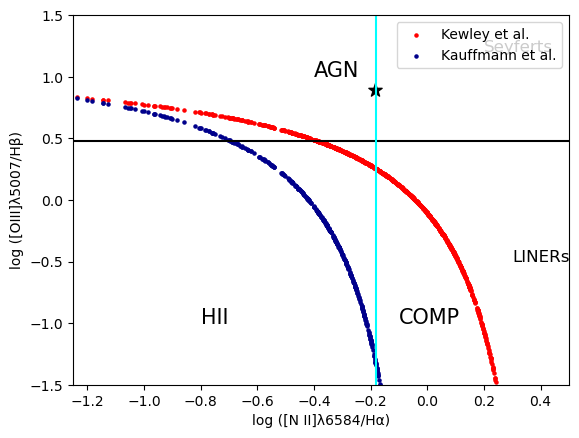

In [20]:
# marking the same object in the BPT diagram

# plotting of the separation curves
plt.xlabel('log ([N II]\u03BB6584/H\u03B1)')
plt.ylabel('log ([OIII]\u03BB5007/H\u03B2)')
#plt.scatter(l_nii_Ha3, L_oiii_Hb3 , color='darkcyan', s=5)
plt.scatter(l_nii_Ha3, l_oiii_Hb4 , color='red', s=5, label='Kewley et al.')
plt.scatter(l_nii_Ha3, l_oiii_Hb5 , color='darkblue', s=5, label='Kauffmann et al.')
plt.xlim(-1.25,0.5)
plt.ylim(-1.5,1.5)

# putting text labels in a plot
plt.text(-0.1,-1.0, 'COMP', fontsize=15)
plt.text(0.3,-0.5, 'LINERs', fontsize=12)
plt.text(-0.4,1.0, 'AGN', fontsize=15)
plt.text(-0.8,-1.0, 'HII', fontsize=15)
plt.text(0.2,1.2, 'Seyferts', fontsize=12)

plt.axhline(0.48, linestyle='-', color='black')
plt.axvline(-0.18, linestyle='-', color='cyan')
plt.legend()

# Mark the object
plt.scatter(-0.183093, 0.891474, s=100, c='black', marker='*')


b) We see that the same object (-0.183093, 0.891474) when marked in the BPT diagram also lies in the AGN region. So it agrees with the optical classification from BPT diagram.

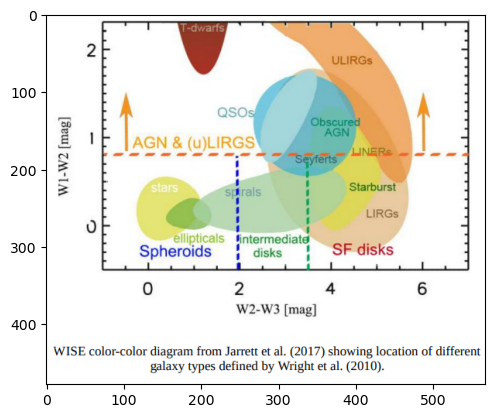

In [21]:
# to insert an image in the code

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the image file
image = mpimg.imread("C:/Users/SREEPARNA/OneDrive/Pictures/Wise.png")

# Display the image
plt.imshow(image)
plt.show()


c) On comparing with the above WISE color - color plot we see the coordinates of the marked AGN  (3.826, 1.050) lie in the 'Obscured AGN' region. 
Obscured AGNs are so because of presence of significant amount of dust and gas in the host galaxy.
According to the WISE color plot, an obscured AGN is classified as a galaxy that falls within the "AGN wedge". This wedge is defined by the following criteria:

    W1-W2 > 0.8
    W2-W3 > 1.2
    